## Virtual Learning Environment (VLE) - Data Analysis and Machine Learning project
#### Author : Mohammad Sayfe
#####                MSc Data Science
####               Msayfe9@gmail.com

### -----------------------------------------------------------------------------------------------------------------------------------------------
### Introduction 

###### The purpose of this project is to find patterns that leads to students profiling,by this we can better understand how to personalize their experience.in addition to use supervised learning (classification) model to predict  students' engagment with the Virtual Learning Environment (VLE) platform.

###### data used : 
*-open University Learning Analytics dataset
It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). 
https://analyse.kmi.open.ac.uk/open_dataset

Datasets  description : 
###### 1-vle.csv

The csv file contains information about the available materials in the VLE. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The vle.csv file contains the following columns:
-id_site – an identification number of the material.

**-code_module** an identification code for module.

**-code_presentation** - the identification code of presentation.

**-activity_type** – the role associated with the module material.

**-week_from** – the week from which the material is planned to be used.

**-week_to** – week until which the material is planned to be used.

###### 2- studentVle.csv

The studentVle.csv file contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:

**--code_module** – an identification code for a module.

**-code_presentation** - the identification code of the module presentation.

**-id_student** – a unique identification number for the student.

**-id_site** - an identification number for the VLE material.

**-date** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.

-sum_click – the number of times a student interacts with the material in that day


###### 3- studentInfo.csv

This file contains demographic information about the students together with their results. File contains the following columns:

**code_module** – an identification code for a module on which the student is registered.

**code_presentation** - the identification code of the presentation during which the student is registered on the module.

**id_student** – a unique identification number for the student.

**gender** – the student’s gender.

**region** – identifies the geographic region, where the student lived while taking the module-presentation.

**highest_education** – highest student education level on entry to the module presentation.

**imd_band** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

**age_band** – band of the student’s age.

**num_of_prev_attempts** – the number times the student has attempted this module.

**studied_credits** – the total number of credits for the modules the student is currently studying.

**disability** – indicates whether the student has declared a disability.

**final_result** – student’s final result in the module-presentation.

###### 4- studentRegistration.csv

This file contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:

**code_module** – an identification code for a module.

**code_presentation** - the identification code of the presentation.

**id_student** – a unique identification number for the student.

**date_registration** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).

**date_unregistration** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the 

**module-presentation.Students**, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

###### 5- studentAssessment.csv

This file contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the following columns:

**id_assessment** – the identification number of the assessment.

**id_student** – a unique identification number for the student.

**date_submitted** – the date of student submission, measured as the number of days since the start of the module presentation.

**is_banked** – a status flag indicating that the assessment result has been transferred from a previous presentation.

**score** – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

###### 6- assessments.csv

This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. CSV contains columns:

**code_module** – identification code of the module, to which the assessment belongs.

**code_presentation** - identification code of the presentation, to which the assessment belongs.

**id_assessment** – identification number of the assessment.

**assessment_type** – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).

**date** – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).

**weight** - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

### 1.Importing Data

In [417]:
#Import Needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [418]:
#import datasets
studentVle  = pd.read_csv("D:AbwabProject/anonymisedData/studentVle.csv",sep=',')
vle = pd.read_csv("D:AbwabProject/anonymisedData/vle.csv",sep=',')
studentInfo = pd.read_csv("D:AbwabProject/anonymisedData/studentInfo.csv",sep=',')
studentRegistration = pd.read_csv("D:AbwabProject/anonymisedData/studentRegistration.csv",sep=',')
studentAssessment = pd.read_csv("D:AbwabProject/anonymisedData/studentAssessment.csv",sep=',')
assessments = pd.read_csv("D:AbwabProject/anonymisedData/assessments.csv",sep=',')

### 2.Data Cleaning

In [419]:
#Select Registered Student 
RegisterdStudent = studentRegistration[studentRegistration["date_unregistration"].isnull()]
RegisterdStudentInfo = studentInfo[studentInfo["final_result"]!="Withdrawn"]
Students_Completed = pd.merge(RegisterdStudent,RegisterdStudentInfo,on="id_student")

In [420]:
#Student Who completed The course
Num_Students_Completed = len(Students_Completed['id_student'].unique().tolist())
print("Number of students who completed the courses = ",Num_Students_Completed)

Number of students who completed the courses =  21111


In [421]:
#completed student with their interactions
Students_Completed_vle = pd.merge(Students_Completed,studentVle,on="id_student")

#Number of Students who completed the course with their interactions
Num_Students_Completed_vle = len(Students_Completed_vle['id_student'].unique().tolist())

#completed student with their each activity
Students_Completed_vle_acti = pd.merge(Students_Completed_vle,vle,on="id_site")

### 3.Data Sampling

In [422]:
#Due to largness of the data , we should take a sample 
Students_CVA_Sample =  Students_Completed_vle_acti.sample(frac =.10)

In [423]:
Students_CVA_Sample.columns.values

array(['code_module_x', 'code_presentation_x', 'id_student',
       'date_registration', 'date_unregistration', 'code_module_y',
       'code_presentation_y', 'gender', 'region', 'highest_education',
       'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits',
       'disability', 'final_result', 'code_module_x',
       'code_presentation_x', 'id_site', 'date', 'sum_click',
       'code_module_y', 'code_presentation_y', 'activity_type',
       'week_from', 'week_to'], dtype=object)

In [424]:
#Drop Unecessary columns 
Students_CVA_Sample=Students_CVA_Sample.drop(columns=['code_module_x', 'code_presentation_x','highest_education','disability','region'])
#Drop duplicate columns
Students_CVA_Sample=Students_CVA_Sample.loc[:,~Students_CVA_Sample.columns.duplicated()]

In [425]:
#Drop NaN columns 
NAN_Col = Students_CVA_Sample.isna().sum()
print(NAN_Col)
Students_CVA_Sample=Students_CVA_Sample.drop(columns=['date_unregistration','week_from','week_to'])

id_student                    0
date_registration             0
date_unregistration     1371540
code_module_y                 0
code_presentation_y           0
gender                        0
imd_band                  86142
age_band                      0
num_of_prev_attempts          0
studied_credits               0
final_result                  0
id_site                       0
date                          0
sum_click                     0
activity_type                 0
week_from               1199858
week_to                 1199858
dtype: int64


In [426]:
#Rename Ambigues columns
Students_CVA_Sample.rename(columns={'code_module_y':'code_module',
                          'code_presentation_y':'code_presentation'
                          },inplace=True)

### 4. Exploratory Data Analysis (EDA)

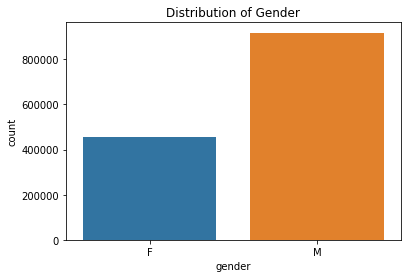

In [427]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='gender', data=Students_CVA_Sample);
plt.title('Distribution of Gender');

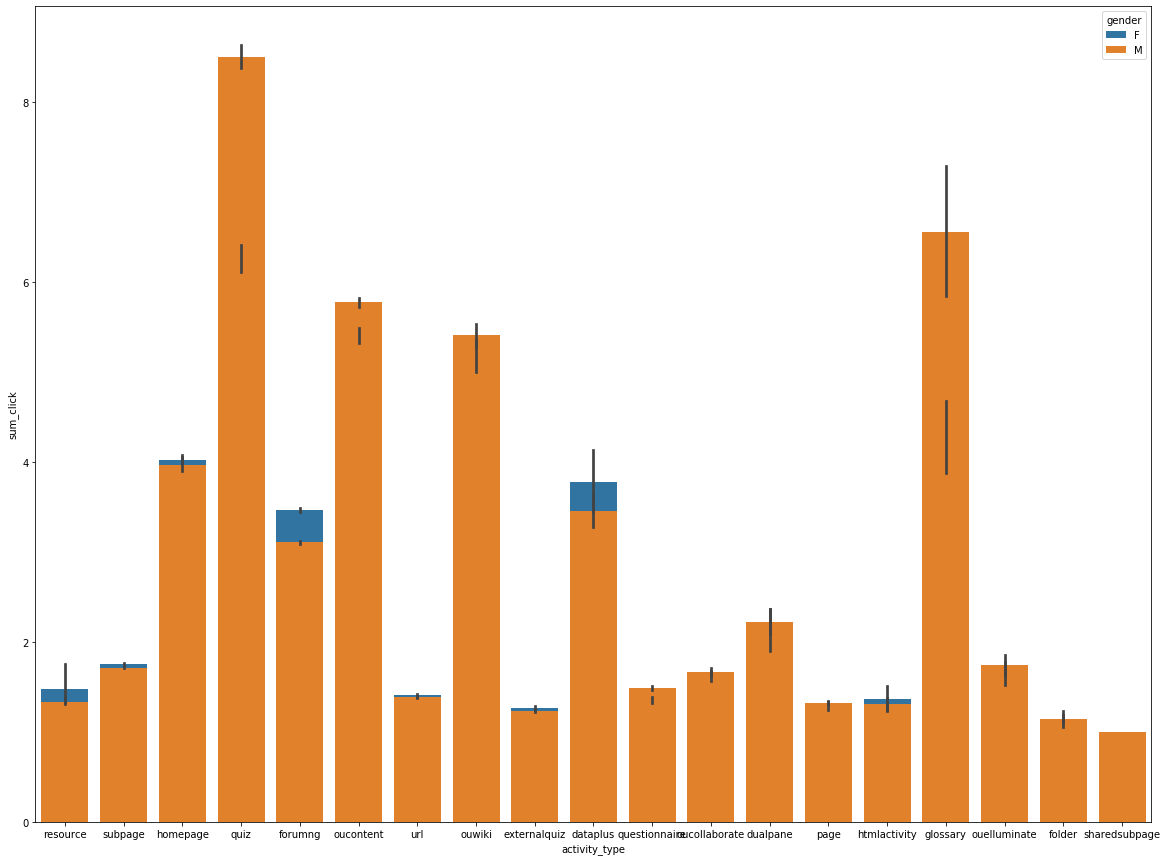

In [428]:
# See Plot sum_click ,Activity type,by Gender
plt.figure(figsize=(20,15))
sns.barplot(x="activity_type", y="sum_click", hue="gender",
                 data=Students_CVA_Sample, dodge=False)


plt.show()

In [431]:
#Reset Students_CVA Sample index
#Students_CVA_Sample.set_index(level=0, inplace=True)
Students_CVA_Sample.reset_index(level=0, inplace=True)

In [432]:
Students_CVA_Sample = Students_CVA_Sample.drop(columns='index')
Students_CVA_Sample.head()


,id_student,date_registration,code_module,code_presentation,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,id_site,date,sum_click,activity_type
0,570061,-95.0,FFF,2013J,F,30-40%,0-35,0,180,Pass,716762,-17,1,resource
1,630013,-36.0,FFF,2014B,M,40-50%,0-35,0,60,Pass,779671,66,4,subpage
2,521895,-52.0,BBB,2013J,F,NaN,0-35,0,120,Pass,704083,44,1,resource
3,581082,-113.0,EEE,2014J,M,90-100%,0-35,0,60,Pass,832565,131,2,homepage
4,600292,-22.0,FFF,2014B,M,20-30%,35-55,0,60,Pass,779259,19,1,quiz


In [433]:
Students_CVA_Sample.shape

(1371540, 14)

### 5.Data Reshaping
as data provided by interactions for each studet and in the long format.
this section will reshape:

1. Reshape the long data into wide data based on clicks for each student activity 

2. Add new sum_clicks columns contains the sum for all students activity

*** Using pd.DataFrame.pivot_table() funciton ***


In [434]:
#Aggregate sum_click using sum based on activity type
Student_CVA_pivot = Students_CVA_Sample.pivot_table(index = ['id_student'],columns='activity_type', values='sum_click',aggfunc=np.sum,fill_value=0)

In [435]:
#Data in the long format
Student_CVA_pivot.head()

activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,resource,sharedsubpage,subpage,url
id_student,,,,,,,,,,,,,,,,,,,
6516,0,0,0,0,30,0,33,0,0,198,0,0,0,0,0,5,0,12,11
11391,0,0,0,0,7,0,7,0,0,118,0,0,0,0,0,2,0,0,0
23629,0,0,0,0,26,0,2,0,0,0,0,0,0,0,0,0,0,0,0
23698,0,0,0,0,11,0,19,0,0,0,0,0,0,0,71,4,0,19,0
23798,0,0,0,0,12,0,11,0,0,0,0,0,0,0,23,0,0,0,7


In [436]:
#Reset index as id studnet be as the first column
Student_CVA_pivot.reset_index(level=0, inplace=True)
Student_CVA_pivot.head()

activity_type,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,resource,sharedsubpage,subpage,url
0,6516,0,0,0,0,30,0,33,0,0,198,0,0,0,0,0,5,0,12,11
1,11391,0,0,0,0,7,0,7,0,0,118,0,0,0,0,0,2,0,0,0
2,23629,0,0,0,0,26,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,23698,0,0,0,0,11,0,19,0,0,0,0,0,0,0,71,4,0,19,0
4,23798,0,0,0,0,12,0,11,0,0,0,0,0,0,0,23,0,0,0,7


In [437]:
#Unique Students
Unique_Students_No_F = len(Student_CVA_pivot['id_student'].unique().tolist())
Unique_Students_No_F

20442

#### - Merging the new dataset with the rest of columns except the unecessary columns

In [438]:
Students_CVA_Sample_dropeed = Students_CVA_Sample.drop(columns=['sum_click','code_presentation','id_site'])
Students_CVA_Sample_dropped = Students_CVA_Sample_dropeed.drop_duplicates(subset='id_student', keep="first")

In [141]:
Student_CVA_Final = pd.merge(Student_CVA_pivot,Students_CVA_Sample_dropped, on='id_student')

In [142]:
Student_CVA_Final.head()

,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,date_registration,code_module,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,date,activity_type
0,6516,0,0,0,0,38,0,36,0,0,...,-52.0,AAA,M,80-90%,55<=,0,60,Pass,29,homepage
1,11391,0,0,0,0,22,0,15,0,0,...,-159.0,AAA,M,90-100%,55<=,0,240,Pass,37,forumng
2,23629,0,0,0,0,2,0,3,0,0,...,-47.0,BBB,F,20-30%,0-35,2,60,Fail,87,quiz
3,23698,0,0,0,0,3,0,3,0,0,...,-110.0,CCC,F,50-60%,0-35,0,120,Pass,109,subpage
4,23798,0,0,0,0,15,1,9,0,0,...,-27.0,BBB,M,50-60%,0-35,0,60,Distinction,242,url


### 6.Correlation Matrix
Using the correlation matrix to figure out the most correlated features as show below :

In [416]:
print("Correlation Matrix")
print(Student_CVA_pivot.corr())
print()

def get_redundant_pairs(Student_CVA_pivot):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = Student_CVA_pivot.columns
    for i in range(0, Student_CVA_pivot.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(Student_CVA_pivot, n=5):
    au_corr = Student_CVA_pivot.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(Student_CVA_pivot)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
correlated_df = get_top_abs_correlations(Student_CVA_pivot, 5)
print(correlated_df)



Correlation Matrix
activity_type  id_student  dataplus  dualpane  externalquiz    folder  \
activity_type                                                           
id_student       1.000000  0.010092  0.005313      0.019945 -0.013542   
dataplus         0.010092  1.000000  0.198622     -0.006606  0.143986   
dualpane         0.005313  0.198622  1.000000     -0.031311  0.085028   
externalquiz     0.019945 -0.006606 -0.031311      1.000000 -0.028245   
folder          -0.013542  0.143986  0.085028     -0.028245  1.000000   
forumng          0.018978  0.299602  0.181347      0.227986  0.066699   
glossary         0.005816  0.040270  0.001669      0.160590  0.004673   
homepage         0.013012  0.323545  0.197656      0.337600  0.124433   
htmlactivity     0.015575  0.122809  0.006120     -0.024171 -0.011001   
oucollaborate    0.011363  0.106475  0.044695      0.280308  0.029029   
oucontent        0.009398  0.403359  0.331584      0.031468  0.235814   
ouelluminate    -0.001927  0.062

#### - Taking Top Absolute Correlations to reduce the dimensionality of the data 

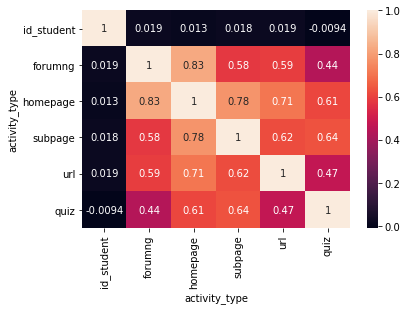

In [222]:
Correlated_Activity=Student_CVA_pivot[["id_student","forumng","homepage","subpage","url","quiz"]]

corr=Correlated_Activity.corr()

ax1 = sns.heatmap(corr, annot = True)

#### - Find the sum clicks for each student and add it as the last columns

In [224]:
Student_CVA_Corr= pd.DataFrame(data=Correlated_Activity)
Student_CVA_Corr['sum_clicks'] = Correlated_Activity.loc[:, Correlated_Activity.columns != 'id_student'].sum(axis=1)

In [225]:
final_data=pd.DataFrame(Student_CVA_Corr)

In [226]:
Student_CVA_Corr.head()

activity_type,id_student,forumng,homepage,subpage,url,quiz,sum_clicks
0,6516,38,36,11,21,0,106
1,11391,22,15,2,1,0,40
2,23629,2,3,0,0,2,7
3,23698,3,3,7,1,31,45
4,23798,15,9,1,2,10,37


In [227]:
final_data.sum_clicks.describe()

count    20461.000000
mean       166.616783
std        383.423199
min          0.000000
25%         27.000000
50%         70.000000
75%        169.000000
max      20002.000000
Name: sum_clicks, dtype: float64

### Finding the Outliers

The scattr plot below shows for example the foruming activity with the homepage activity and its datapoint,which highly shows the outliers of the dataset

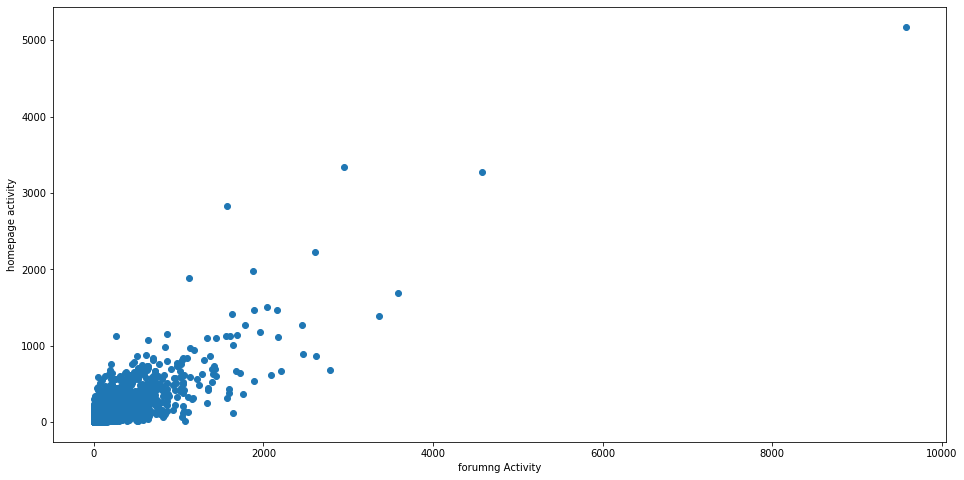

In [228]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(final_data['forumng'], final_data['homepage'])
ax.set_xlabel('forumng Activity')
ax.set_ylabel('homepage activity')
plt.show()

### Dealing with the outliers using Z-score
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.this pipeline using Z-score function defined in scipy library to detect the outliers.

***Wikipedia definition***

In [230]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(final_data))
print(z)

[[1.26261412 0.071946   0.07594384 ... 1.83887439 0.32942932 0.15809754]
 [1.25384503 0.1792361  0.28627235 ... 0.26330398 0.32942932 0.33023531]
 [1.23183148 0.31334872 0.40646007 ... 0.3684129  0.3162423  0.41630419]
 ...
 [3.5797551  1.0546     0.2345411  ... 0.05202278 0.22393315 0.36092391]
 [3.57983065 0.23958678 0.33635057 ... 0.3684129  0.06568891 0.26763975]
 [3.57985043 0.30664309 0.23619414 ... 0.3684129  0.32942932 0.35110049]]


These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

As show below for example z[36][4] = 11.403785996106407 , is an outlier for its big variance of the threshold which is "3"

In [231]:
threshold = 3
print(np.where(z > 3))

(array([   36,    36,    36, ..., 20458, 20459, 20460], dtype=int64), array([1, 2, 4, ..., 0, 0, 0], dtype=int64))


In [232]:
print(z[36][4])

11.403785996106407


###### Final data after removing outliers using Z-score

In [233]:
final_data_o = final_data[(z < 3).all(axis=1)]

In [235]:
final_data_o.sum_clicks.describe()

count    18769.000000
mean       115.055890
std        138.600323
min          0.000000
25%         26.000000
50%         66.000000
75%        151.000000
max       1173.000000
Name: sum_clicks, dtype: float64

#### Classify the Sum_clicks variable into 3 bins as follows: 

sum_clicks between [0,67]     = 'Low Engagment'
sum_clicks between [67,152]   = 'Medium Engagment'
sum_clicks between [152,1174] = 'High Engagment'

based on the dataset description shown above

In [236]:
#Adding Engagment Category that categorize the engagment into levels according to its statistical description
category = pd.cut(final_data_o.sum_clicks,bins=[0,67,152,1174],labels=['Low','Medium','High'])
final_data_o.insert(len(final_data_o.columns),'Engagment',category)

#### As shown below the newdataset with the Engagment column

In [439]:
final_data_o.head()

activity_type,id_student,forumng,homepage,subpage,url,quiz,sum_clicks,Engagment
0,6516,38,36,11,21,0,106,Medium
1,11391,22,15,2,1,0,40,Low
2,23629,2,3,0,0,2,7,Low
3,23698,3,3,7,1,31,45,Low
4,23798,15,9,1,2,10,37,Low


In [237]:
final_data_o.isna().sum()

activity_type
id_student      0
forumng         0
homepage        0
subpage         0
url             0
quiz            0
sum_clicks      0
Engagment     157
dtype: int64

In [238]:
#Drop NA values from the cleansed dataset
final_data_o = final_data_o.dropna()

In [239]:
final_data_o.shape

(18612, 8)

In [247]:
#Merge the rest of the dataset after removing the outliers and adding the engagment column

Student_CVA_o_Final = pd.merge(final_data_o,Students_CVA_Sample_dropped, on='id_student')
Student_CVA_o_Final=Student_CVA_o_Final.drop(columns=["activity_type"])

In [248]:
Student_CVA_o_Final.shape

(18612, 17)

In [249]:
Student_CVA_o_Final.head()

,id_student,forumng,homepage,subpage,url,quiz,sum_clicks,Engagment,date_registration,code_module,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,date
0,6516,38,36,11,21,0,106,Medium,-52.0,AAA,M,80-90%,55<=,0,60,Pass,29
1,11391,22,15,2,1,0,40,Low,-159.0,AAA,M,90-100%,55<=,0,240,Pass,37
2,23629,2,3,0,0,2,7,Low,-47.0,BBB,F,20-30%,0-35,2,60,Fail,87
3,23698,3,3,7,1,31,45,Low,-110.0,CCC,F,50-60%,0-35,0,120,Pass,109
4,23798,15,9,1,2,10,37,Low,-27.0,BBB,M,50-60%,0-35,0,60,Distinction,242


## Profiling Students (Data Analysis)

To understand more about the data patterns using data visualization for the important features and detect the correlations between different variables.

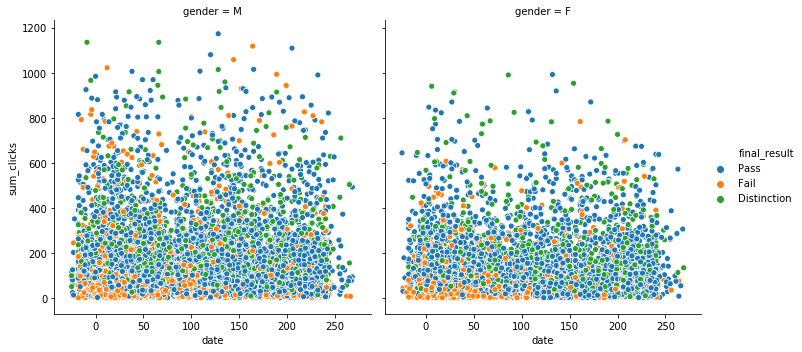

In [415]:
#Visualzie the forum interaction and how its relevant to the students' final results
sns.relplot(x="date", y="sum_clicks", hue="final_result",
            col="gender", data=Student_CVA_o_Final);

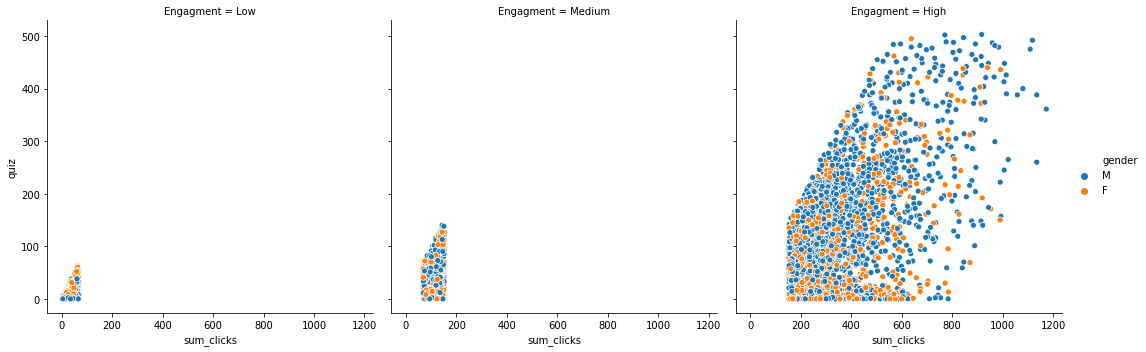

In [412]:
#Visualzie the forum interaction with different modules and how its relevant to the students' final results

sns.relplot(x="sum_clicks", y="quiz", hue="gender",
            col="Engagment", data=Student_CVA_o_Final);


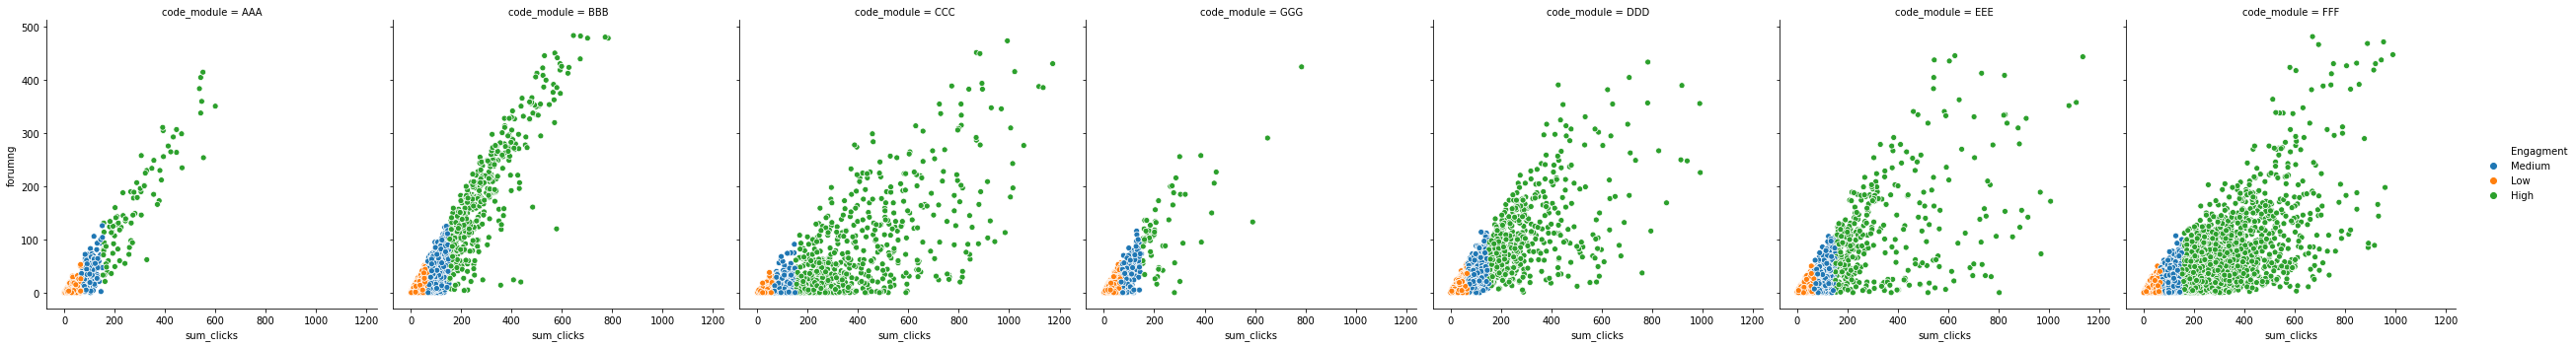

In [440]:
#Visualzie the forum interaction with different modules and how its relevant to the students' final results

sns.relplot(x="sum_clicks", y="forumng", hue="Engagment",
            col="code_module", data=Student_CVA_o_Final);

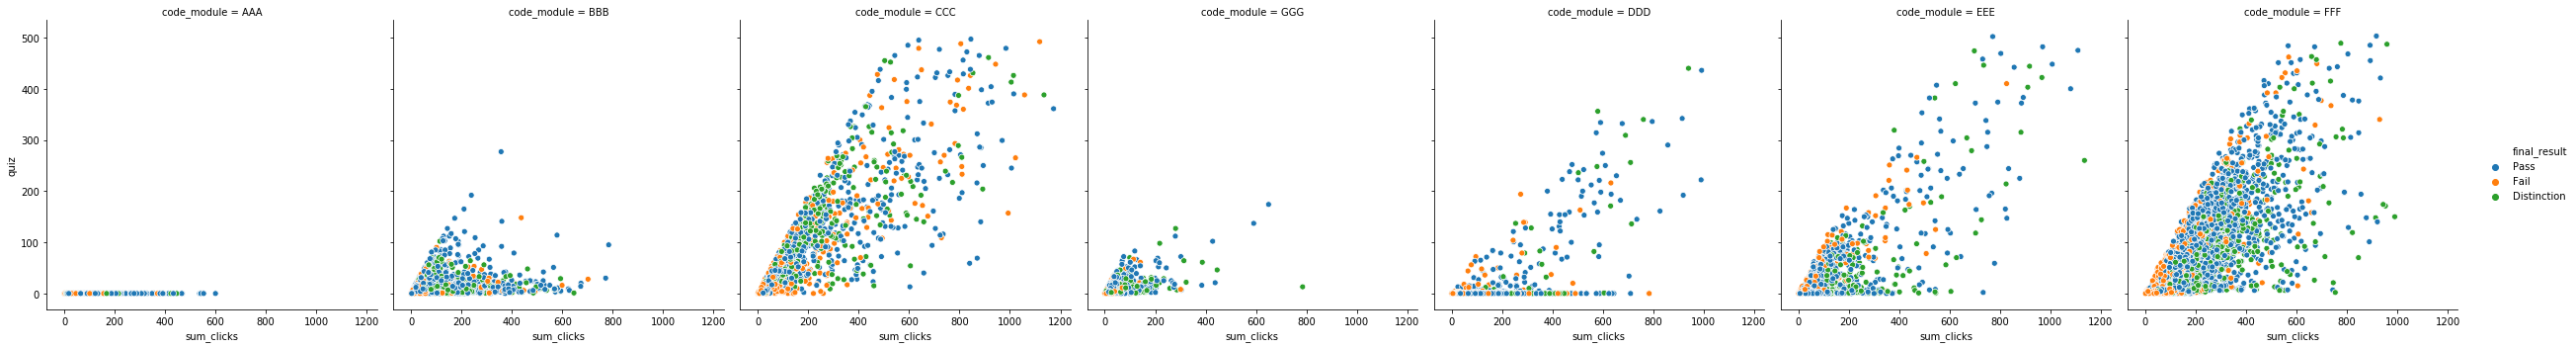

In [399]:
#Visualzie the forum interaction with different modules and how its relevant to the students' final results

sns.relplot(x="sum_clicks", y="quiz", hue="final_result",
            col="code_module", data=Student_CVA_o_Final);


#### Split Dataset into 3 categories (Low_Engagment,Medium_Engagment,High_Engagment)

In [340]:
Low_Engagment     = Student_CVA_o_Final[Student_CVA_o_Final['Engagment'] == 'Low']
Medium_Engagment  = Student_CVA_o_Final[Student_CVA_o_Final['Engagment'] == 'Medium']
High_Engagment    = Student_CVA_o_Final[Student_CVA_o_Final['Engagment'] == 'High']


In [341]:
# Print the average spending score for men and women
print(Low_Engagment['sum_clicks'].mean())
print(Medium_Engagment['sum_clicks'].mean())
print(High_Engagment['sum_clicks'].mean())

29.152571185720358
103.54857142857144
304.07612903225805


In [342]:
Low_Engagment.head()

,id_student,forumng,homepage,subpage,url,quiz,sum_clicks,Engagment,date_registration,code_module,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,date
1,11391,22,15,2,1,0,40,Low,-159.0,AAA,M,90-100%,55<=,0,240,Pass,37
2,23629,2,3,0,0,2,7,Low,-47.0,BBB,F,20-30%,0-35,2,60,Fail,87
3,23698,3,3,7,1,31,45,Low,-110.0,CCC,F,50-60%,0-35,0,120,Pass,109
4,23798,15,9,1,2,10,37,Low,-27.0,BBB,M,50-60%,0-35,0,60,Distinction,242
5,24186,0,4,0,0,20,24,Low,-25.0,GGG,F,10-20,0-35,0,30,Pass,110


In [343]:
#Take the numerical variables to see their correlations 
Low_Engagment_Num = Low_Engagment.select_dtypes(exclude=['object'])

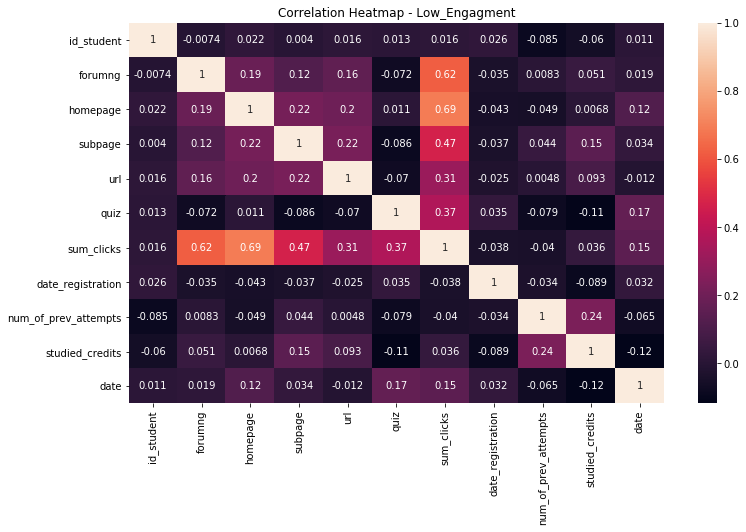

In [441]:
#Display the Low_engagment correlations
fig, ax = plt.subplots(figsize=(12,7))

sns.heatmap(Low_Engagment_Num.corr(), annot=True);
plt.title('Correlation Heatmap - Low_Engagment');
plt.show()

In [372]:
#Convert Categorical final_result feature into numerical (0,1) to see its correlation with other numeric features
#Using get_dummies to encode the categorical data

df_dummies = pd.get_dummies(Low_Engagment['final_result'])
#del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([Low_Engagment, df_dummies], axis=1)
del df_new['final_result']

df_new = df_new.select_dtypes(exclude=['object','category'])

#df_new = df_new.loc[:,~df_new.columns.duplicated()]

x = df_new.values

In [373]:
df_new.dtypes

id_student                int64
forumng                   int64
homepage                  int64
subpage                   int64
url                       int64
quiz                      int64
sum_clicks                int64
date_registration       float64
num_of_prev_attempts      int64
studied_credits           int64
date                      int64
Distinction               uint8
Fail                      uint8
Pass                      uint8
dtype: object

In [374]:
df_new.isna().sum()

id_student              0
forumng                 0
homepage                0
subpage                 0
url                     0
quiz                    0
sum_clicks              0
date_registration       0
num_of_prev_attempts    0
studied_credits         0
date                    0
Distinction             0
Fail                    0
Pass                    0
dtype: int64

In [376]:
df_new.corr().head()

,id_student,forumng,homepage,subpage,url,quiz,sum_clicks,date_registration,num_of_prev_attempts,studied_credits,date,Distinction,Fail,Pass
id_student,1.000000,-0.007417,0.022366,0.004049,0.015570,0.012928,0.015861,0.026252,-0.084806,-0.059897,0.011462,0.032059,-0.038242,0.020448
forumng,-0.007417,1.000000,0.186238,0.120628,0.157728,-0.072205,0.621481,-0.034835,0.008288,0.051048,0.019361,0.093508,-0.146049,0.093913
homepage,0.022366,0.186238,1.000000,0.217984,0.201089,0.011257,0.691297,-0.043382,-0.049095,0.006806,0.120478,0.087591,-0.283676,0.233842
subpage,0.004049,0.120628,0.217984,1.000000,0.223274,-0.086165,0.468578,-0.037283,0.044308,0.147962,0.033708,-0.030458,-0.057029,0.073301
url,0.015570,0.157728,0.201089,0.223274,1.000000,-0.070126,0.313884,-0.025133,0.004832,0.092860,-0.012421,-0.005929,-0.088719,0.091360


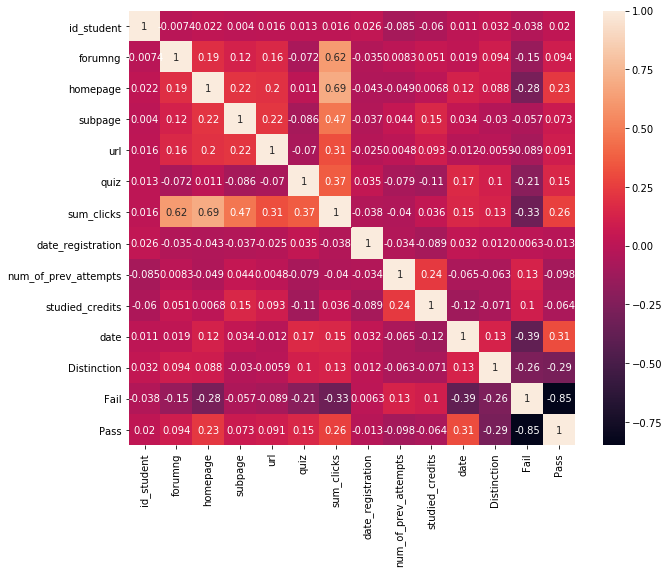

In [377]:
#See the correlation after encoding the final_result categorical variable 

fig, ax = plt.subplots(figsize=(10,8))
corr=df_new.corr()
#plot correlation between final results and sum clicks
ax1=sns.heatmap(corr, annot = True)
plt.show()

### Data Normalization  
##### Standarizing data
Using min max scaler as In this approach, the data is scaled to a fixed range — usually 0 to 1. In contrast to standardization, the cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers. 

In [391]:

names=df_new.columns.values
from sklearn import preprocessing

# Create the Scaler object
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(df_new)

# 3. convert the scaled array to dataframe
df_normalized = pd.DataFrame(scaled_array,columns=names)
df_normalized

,id_student,forumng,homepage,subpage,url,quiz,sum_clicks,date_registration,num_of_prev_attempts,studied_credits,date,Distinction,Fail,Pass
0,0.000000,0.392857,0.250000,0.039216,0.05,0.000000,0.590909,0.367397,0.000000,0.7,0.213058,0.0,0.0,1.0
1,0.005176,0.035714,0.050000,0.000000,0.00,0.032258,0.090909,0.639903,0.333333,0.1,0.384880,0.0,1.0,0.0
2,0.005205,0.053571,0.050000,0.137255,0.05,0.500000,0.666667,0.486618,0.000000,0.3,0.460481,0.0,0.0,1.0
3,0.005248,0.267857,0.150000,0.019608,0.10,0.161290,0.545455,0.688564,0.000000,0.1,0.917526,1.0,0.0,0.0
4,0.005412,0.000000,0.066667,0.000000,0.00,0.322581,0.348485,0.693431,0.000000,0.0,0.463918,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,0.998992,0.089286,0.133333,0.215686,0.00,0.032258,0.378788,0.625304,0.000000,0.0,0.216495,1.0,0.0,0.0
9408,0.999333,0.375000,0.266667,0.196078,0.00,0.000000,0.696970,0.620438,0.500000,0.3,0.604811,0.0,1.0,0.0
9409,0.999787,0.642857,0.266667,0.254902,0.05,0.000000,0.984848,0.664234,0.166667,0.1,0.553265,0.0,0.0,1.0
9410,0.999957,0.410714,0.166667,0.137255,0.20,0.016129,0.666667,0.725061,0.000000,0.3,0.075601,0.0,1.0,0.0


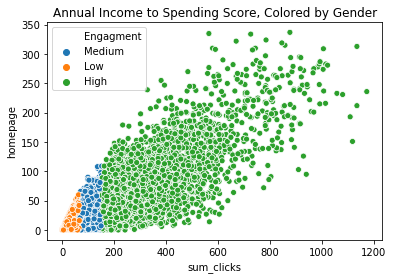

In [394]:
#Display the scatterd data between sum_clicks and homepage that indicates the high homepage activity will lead to high overall engagment 

sns.scatterplot('sum_clicks', 'homepage', hue='Engagment', data=Student_CVA_o_Final);
plt.title('Sum_clicks to homepage Activity, Colored by Engagment');

### Final Paterns
##### Student Profiling : 

1.Low Engagment ,low results.

2.High results , high engagment.

3.Earlier date more engagment # Start date of the module-presentation.

4.Less Engagment more Fail Results.

##### Module Insights

1.Module 'GGG' has lowest engagment in terms of foruming

2.Low engagment  with quizes will lead to fail results

3.Earlier registering data leads to more engagment then better results


## Supervised Learning - Classification

- Use Logistic Regression to build the classification model 
- Use the model to predict values of students engagment

In [443]:
Student_Dataframe = Student_CVA_o_Final

In [444]:
Student_Dataframe.head()

,id_student,forumng,homepage,subpage,url,quiz,sum_clicks,Engagment,date_registration,code_module,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,date
0,6516,38,36,11,21,0,106,Medium,-52.0,AAA,M,80-90%,55<=,0,60,Pass,29
1,11391,22,15,2,1,0,40,Low,-159.0,AAA,M,90-100%,55<=,0,240,Pass,37
2,23629,2,3,0,0,2,7,Low,-47.0,BBB,F,20-30%,0-35,2,60,Fail,87
3,23698,3,3,7,1,31,45,Low,-110.0,CCC,F,50-60%,0-35,0,120,Pass,109
4,23798,15,9,1,2,10,37,Low,-27.0,BBB,M,50-60%,0-35,0,60,Distinction,242


In [445]:
#import needed libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [465]:
#Drop all caterogical features but keep the Engagment columns
Student_Dataframe=Student_Dataframe.select_dtypes(exclude=['object'])

In [466]:
Student_Dataframe

,id_student,forumng,homepage,subpage,url,quiz,sum_clicks,Engagment,date_registration,num_of_prev_attempts,studied_credits,date
0,6516,38,36,11,21,0,106,Medium,-52.0,0,60,29
1,11391,22,15,2,1,0,40,Low,-159.0,0,240,37
2,23629,2,3,0,0,2,7,Low,-47.0,2,60,87
3,23698,3,3,7,1,31,45,Low,-110.0,0,120,109
4,23798,15,9,1,2,10,37,Low,-27.0,0,60,242
...,...,...,...,...,...,...,...,...,...,...,...,...
18607,2375123,36,16,13,1,0,66,Low,-37.0,1,60,136
18608,2375526,23,10,7,4,1,45,Low,-12.0,0,120,-3
18609,2375627,19,1,14,1,0,35,Low,-52.0,1,60,232
18610,2375759,50,41,12,0,57,160,High,-59.0,1,60,199


### Preperaing Data 

In [470]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = Student_Dataframe.iloc[:,Student_Dataframe.columns != 'Engagment']

# y = target values, last column of the data frame
y = Student_Dataframe["Engagment"]

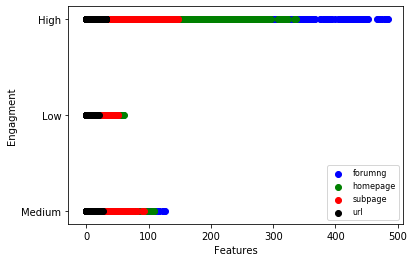

In [471]:
# Plot the relation of some of  features with each Engagment

plt.xlabel('Features')
plt.ylabel('Engagment')

pltX = Student_Dataframe.loc[:, 'forumng']
pltY = Student_Dataframe.loc[:,'Engagment']
plt.scatter(pltX, pltY, color='blue', label='forumng')

pltX = Student_Dataframe.loc[:, 'homepage']
pltY = Student_Dataframe.loc[:,'Engagment']
plt.scatter(pltX, pltY, color='green', label='homepage')

pltX = Student_Dataframe.loc[:, 'subpage']
pltY = Student_Dataframe.loc[:,'Engagment']
plt.scatter(pltX, pltY, color='red', label='subpage')

pltX = Student_Dataframe.loc[:, 'url']
pltY = Student_Dataframe.loc[:,'Engagment']
plt.scatter(pltX, pltY, color='black', label='url')


plt.legend(loc=4, prop={'size':8})
plt.show()

### Split the data into training and testing

In [472]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Logistic Regression model

In [473]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Test the model

In [476]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( "Accuracy = ",accuracy_score(y_test, predictions))

['High' 'High' 'Medium' ... 'Low' 'Low' 'Low']

              precision    recall  f1-score   support

        High       0.84      0.89      0.86       920
         Low       0.93      0.91      0.92      1875
      Medium       0.70      0.70      0.70       928

    accuracy                           0.85      3723
   macro avg       0.82      0.83      0.83      3723
weighted avg       0.85      0.85      0.85      3723

Accuracy =  0.849583669084072


***As shown above the accuracy is 0.85 % which suffecient in terms of prediction and its pretty good using sample of 10% of the data , that indicates using more data will give better accuracy and results***

### Final Insights 
1.The classification model can predict students activity

2.Teachers can detect students activity during the module period 

3.Machine Learning model could help to personalize the learning and teaching experience in terms of students engagment

## Conclusion
This project aims to analyse Virtual Learning Environment (VLE) dataset ,including students interactions and activites such using raeching the homepage and forums clicks , that indicates for students profiling that help to personalize students experience in the VLE platfrom,Moreover using Machine Learning specifically Supervised learning (Classification),to detect and predict the students engagment with the VLE platform during their classes.Final results shown as below : 

**Final Results :**
***1-Data Analysis part :***

Student Profiling:

1.Low Engagment ,low results.

2.High results , high engagment.

3.Earlier date more engagment # Start date of the module-presentation.

4.Less Engagment more Fail Results.

Module Insights

1.Module 'GGG' has lowest engagment in terms of foruming

2.Low engagment with quizes will lead to fail results

3.Earlier registering data leads to more engagment then better results

***2-Supervised Learning (Classification)***

1.The classification model can predict students activity engagment

2.Teachers can detect students activity during the module period

3.Machine Learning model could help to personalize the learning and teaching experience in terms of students engagment
